In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


In [2]:
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 10)

In [4]:
df.dtypes

,0
carat,float64
cut,category
color,category
clarity,category
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [5]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [6]:
le=LabelEncoder()
category_cols=[ 'color', 'clarity',]


for col in category_cols:
  df[col]=le.fit_transform(df[col])

In [7]:
scaling_cols=['depth' , 'table' , 'price']
sc=StandardScaler()

for col in scaling_cols:
  df[[col]]=sc.fit_transform(df[[col]])

df.head(10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,1,3,-0.174092,-1.099672,-0.904095,3.95,3.98,2.43
1,0.21,Premium,1,2,-1.360738,1.585529,-0.904095,3.89,3.84,2.31
2,0.23,Good,1,4,-3.385019,3.375663,-0.903844,4.05,4.07,2.31
3,0.29,Premium,5,5,0.454133,0.242928,-0.902090,4.20,4.23,2.63
4,0.31,Good,6,3,1.082358,0.242928,-0.901839,4.34,4.35,2.75
5,0.24,Very Good,6,7,0.733344,-0.204605,-0.901589,3.94,3.96,2.48
6,0.24,Very Good,5,6,0.384331,-0.204605,-0.901589,3.95,3.98,2.47
7,0.26,Very Good,4,2,0.105120,-1.099672,-0.901338,4.07,4.11,2.53
8,0.22,Fair,1,5,2.338808,1.585529,-0.901338,3.87,3.78,2.49
9,0.23,Very Good,4,4,-1.639950,1.585529,-0.901087,4.00,4.05,2.39


In [8]:
df.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,5.394000e+04,5.394000e+04,5.394000e+04,53940.000000,53940.000000,53940.000000
mean,0.797940,2.594197,3.835150,-3.996902e-15,9.695207e-17,-9.273676e-17,5.731157,5.734526,3.538734
std,0.474011,1.701105,1.724591,1.000009e+00,1.000009e+00,1.000009e+00,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,-1.308760e+01,-6.470073e+00,-9.040952e-01,0.000000,0.000000,0.000000
25%,0.400000,1.000000,2.000000,-5.231053e-01,-6.521385e-01,-7.476808e-01,4.710000,4.720000,2.910000
50%,0.700000,3.000000,4.000000,3.531678e-02,-2.046051e-01,-3.839672e-01,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,5.239361e-01,6.904618e-01,3.487866e-01,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,1.204139e+01,1.680167e+01,3.732438e+00,10.740000,58.900000,31.800000


In [9]:
x=df.drop('cut',axis=1)
y=df['cut']

In [10]:
le=LabelEncoder()

y_en=le.fit_transform(y)

y_en


array([2, 3, 1, ..., 4, 3, 2])

In [11]:
y_cat=to_categorical(y_en)

y_cat

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [12]:
y_cat[0]

array([0., 0., 1., 0., 0.])

In [13]:
y.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y_cat,test_size=0.2,random_state=42)

In [15]:
y_cat.shape

(53940, 5)

In [16]:
Scaler=StandardScaler()

X_train_s=Scaler.fit_transform(X_train)
X_test_s=Scaler.transform(X_test)

In [17]:
model=Sequential([
    Dense(128,activation='relu',),
     Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(5,activation='softmax')
])

In [18]:
early_Stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [19]:
checkpoint=ModelCheckpoint(filepath='/content/Myfiles/model_cp.keras',monitor='val_loss',verbose=1,save_best_only=True)

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
hist=model.fit(X_train_s,y_train,epochs=50,validation_split=0.3,batch_size=30,verbose=1,callbacks=[early_Stopping,checkpoint])

Epoch 1/50
 995/1007 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6111 - loss: 0.9955
Epoch 1: val_loss improved from inf to 0.77865, saving model to /content/Myfiles/model_cp.keras
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6117 - loss: 0.9940 - val_accuracy: 0.7032 - val_loss: 0.7787
Epoch 2/50
1005/1007 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6926 - loss: 0.7878
Epoch 2: val_loss improved from 0.77865 to 0.75768, saving model to /content/Myfiles/model_cp.keras
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6926 - loss: 0.7878 - val_accuracy: 0.7045 - val_loss: 0.7577
Epoch 3/50
1002/1007 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7021 - loss: 0.7699
Epoch 3: val_loss improved from 0.75768 to 0.74269, saving model to /content/Myfiles/model_cp.keras
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7021 - loss: 0.7699 - val_accuracy: 0.7149 - val_loss: 0.7427
Epoch 4/50
1006/1007 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7097 - loss: 0

In [22]:
loss,accuracy=model.evaluate(X_test_s,y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7958 - loss: 0.5185
Loss: 0.5128258466720581
Accuracy: 0.7979236245155334


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,537 (795.07 KB)

 Trainable params: 67,845 (265.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 135,692 (530.05 KB)

In [24]:
X_test_s[:10].shape

(10, 9)

In [25]:
preds=model.predict(X_test_s[:10])
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([[9.5956466e-06, 2.8352169e-03, 5.7878983e-01, 3.7379810e-05,
        4.1832799e-01],
       [1.9966392e-04, 1.3410921e-03, 8.3460277e-01, 2.4530565e-02,
        1.3932596e-01],
       [3.3873443e-05, 9.2663322e-06, 9.7257286e-01, 5.4800166e-03,
        2.1904008e-02],
       [5.4461816e-05, 3.4567443e-06, 9.6629882e-01, 2.5887161e-02,
        7.7561173e-03],
       [3.2128551e-04, 3.0162328e-06, 7.0457631e-01, 2.9415885e-01,
        9.4056275e-04],
       [9.0192133e-01, 9.8078460e-02, 7.5695378e-10, 2.7205023e-14,
        1.7952219e-07],
       [1.8260810e-04, 2.2364525e-02, 6.1290663e-01, 3.7277673e-04,
        3.6417338e-01],
       [5.7847170e-05, 1.4655342e-04, 9.2683423e-01, 6.9509580e-04,
        7.2266333e-02],
       [2.5294308e-04, 5.4038304e-04, 4.7106974e-02, 9.1950405e-01,
        3.2595605e-02],
       [2.6021060e-04, 9.5192334e-03, 6.8759900e-01, 8.8305917e-04,
        3.0173853e-01]], dtype=float32)

In [26]:
preds.shape

(10, 5)

In [27]:
preds.max(axis=1)

array([0.57878983, 0.8346028 , 0.97257286, 0.9662988 , 0.7045763 ,
       0.90192133, 0.61290663, 0.9268342 , 0.91950405, 0.687599  ],
      dtype=float32)

In [28]:
pred_cls=np.argmax(preds,axis=1)
pred_cls

array([2, 2, 2, 2, 2, 0, 2, 2, 3, 2])

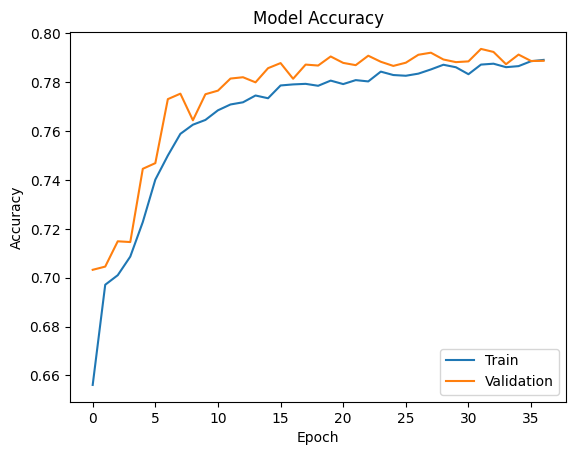

In [30]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

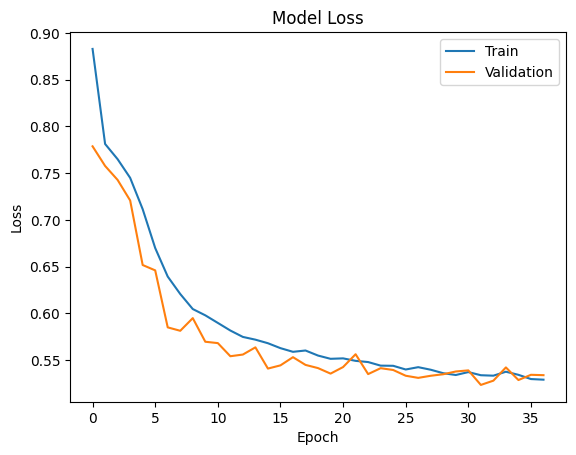

In [32]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()